# Actividad 3: Regresión lineal

*¿Qué es una regresión lineal?*

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es “dibujar una recta” que nos indicará la tendencia de un conjunto de datos continuos. 

En estadística, regresión lineal es una aproximación para modelar la relación entre una variable escalar dependiente “y” y una o mas variables explicativas nombradas con “X”.

Primero,  recordar que la fórmula de una recta es:

$$ Y = mX + b$$

Donde $Y$ es el resultado, $X$ es la variable, $m$ la pendiente (o coeficiente) de la recta y $b$ la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando $X=0$)

Por lo tanto la recta de regresión es la que mejor se ajusta a la nube de puntos (puntos en un plano)

La regresión lineal es fácil de entender ya que podemos representarla como una simple ecuación lineal:

$$ Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \varepsilon $$

donde:

$Y_i$: Es la variable dependiente
$X_1,X_2,...,X_p$: Son las variables independientes
$\beta_0,\beta_1,\beta_2,...,\beta_p,$: son los parámetros que ponderan las variables independientes.

### Regresión lineal simple
En esta actividad, haremos una regresión lineal simple, donde se maneja un variable independiente, por lo que sólo cuenta con 2 parámetros ($\beta_0$ y $\beta_1$). Su forma es:

$$ Y_i = \beta_0 + \beta_1X_1 + \varepsilon $$

### Importar las librerías necesarias

Podrás ocupar `pandas` y `numpy` para procesar los datos y  `matplotlib` para las visualizaciones. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Importar los datos

Importa los datos. Verás que están las columnas `x` e `y`. Separalas en dos `numpy arrays`.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/IIC2433/Syllabus-2020-2/master/Actividades/AC03/data.csv')

In [5]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()

### Conociendo los datos

Grafica en un scatter plot los datos para conocerlos un poco. 

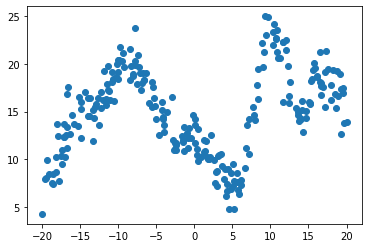

In [6]:
plt.pyplot.scatter(x,y)

# A. Regresión lineal

Vamos a estimar los parámetros $\beta_0,\beta_1$ de la regresión y luego plotear la recta generada. 

### 1. Estimar parámetros

Completa la siguiente función para estimar los parámetros de la regresión, siguiendo los pasos que se mencionan. 

In [42]:
def estimate_params(x, y):
    #1. Obtener las medias de x e y
    mu_x = x.mean()
    mu_y = y.mean()
    
    #2. Obtener S_xy y S_xx
    S_xy = np.dot(x, y) - (1/len(x))*sum(x)*sum(y)
    S_xx = (np.dot(x,x) - (1/len(x))*(sum(x)**2))

    #3. Calcular parámetros
    b_1 = S_xy / S_xx
    b_0 = mu_y - b_1*mu_x

    return b_0, b_1

In [43]:
b_0, b_1 = estimate_params(x, y)
print(b_0)
print(b_1)


14.85830467863445
0.07963944447833916


### 2. Visualización 

En un **mismo gráfico**, grafica mediante `matplotlib`:
- Los datos en un scatter plot. 
- La recta que se genera con la regresión, para que veas como se ajusta la recta a los datos. Para esto, ocupa `np.linspace`, que permite generar datos secuenciales en el rango de valores de x. 

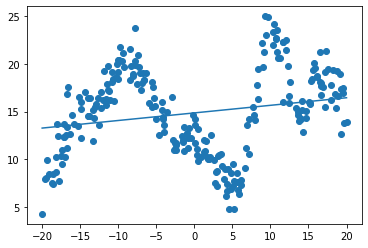

In [38]:
fig = plt.pyplot.figure()

x1 = np.linspace(x.min(), x.max(), 250, endpoint=True)

plt.pyplot.scatter(x, y)
plt.pyplot.plot(x1, b_0 + b_1*x1)


En el gráfico puedes ver que los datos no se ajustan muy bien a la recta, ¿cierto? Bueno, para esto existe el truco del Kernel. 

# B. Regresión lineal con kernel gaussiano

### 1. Aplicar kernels y estimar $\hat{Y}$. 

Para aplicar un kernel gaussiano, es necesario definir cuantos datos del dataset (es decir, cuantos kernels) ocuparemos para hacer las predicciones. Es necesario también definir el sigma del kernel gaussiano. Definamos esto en las siguientes variables:

In [10]:
P = 40 #Número de datos para obtener kernels
SIGMA = 1 

Luego aplicamos el kernel:
 $$\huge \Phi (X) = \huge e^{-\frac{1}{2}(\frac{X - x_i}{\sigma})^2} $$
 
Donde $x_i$ es uno de los $P$ datos elegidos para los kernels, por lo que te quedará un vector de dimensión $P$: 

$$   
\begin{align}
    \begin{bmatrix}
           e^{-\frac{1}{2}(\frac{X - x_1}{\sigma})^2} \\
           e^{-\frac{1}{2}(\frac{X - x_2}{\sigma})^2} \\
           \vdots \\
           e^{-\frac{1}{2}(\frac{X - x_P}{\sigma})^2}
         \end{bmatrix}
  \end{align}
$$

Por otro lado, $X$ es el dato asociado (input) al $\hat{Y}$ que quiero estimar. 

Después de hacer esto, debes hacer la suma ponderada de los $Y$s asociados a los $P$ kernels obtenidos, ocupando como ponderadores estos kernels. 

Para estructurar mejor tu código, tendrás que completar la siguiente clase. Solo debes completar sus dos métodos: `gaussian_kernel` y `predict`. 

In [168]:
class GaussianKernelRegression:

    def __init__(self, mus, y, sigma):
        #muestra de P elementos del dataset, separados en x e y:
        self.mus = mus
        self.y = y 
        self.sigma = sigma #para el cálculo del kernel
    
    '''
    Recibe un escalar y retorna un vector con el kernel gaussiano 
    aplicado a este, utilizando los P datos elegidos para los kernels. 
    '''
    def gaussian_kernel(self, X):
        vector = np.array([np.exp(-0.5*((X-i)/self.sigma)**2) for i in self.mus])
        return vector
    
    '''
    Recibe el X correspondiente al Ytongo que quiero estimar. 
    Usa el método gaussian_kernel para calcular los kernels, 
    luego hace la suma ponderada de ellos y retorna Ytongo. 
    '''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel(i) for i in X])
        W = kernels/sum(kernels)
        predicted = np.dot(W, self.y)
        return predicted

Ahora instancia un objeto `GaussianKernelRegression`. Recuerda que esta recibe una muestra de tamaño $P$ de los datos, separada en las columnas $x$ e $y$. 

In [229]:

muestra = df.sample(P)
x_muestra = muestra['x'].to_numpy()
y_muestra = muestra['y'].to_numpy()
kernelregression = GaussianKernelRegression(x_muestra, y_muestra, SIGMA)


### 2. Visualización

En un **mismo gráfico**, grafica mediante `matplotlib`:
- Los datos en un scatter plot. 
- La curva que se genera con la regresión, para que veas como se ajusta a los datos. Para esto, ocupa `np.linspace`, que permite generar datos secuenciales en el rango de valores de x. Luego, para cada uno de ellos, predice su valor $\hat{Y}$ mediante el método `predict` de `GaussianKernelRegression`. Asignale otro color para distinguir la curva de los puntos.  

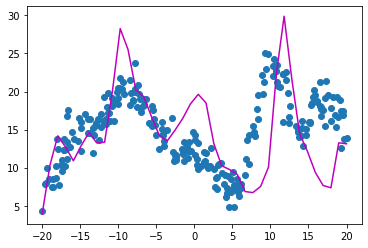

In [230]:
fig = plt.pyplot.figure()

x1 = np.linspace(x.min(), x.max(), P, endpoint=True)

plt.pyplot.scatter(x, y)
plt.pyplot.plot(x1, kernelregression.predict(x1), '-m')